In [55]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

In [30]:
# URL aggiornato dell'API di Whisky Hunter
api_url = "https://whiskyhunter.net/api/auctions_data/"  # Nuovo endpoint
headers = {"User-Agent": "Mozilla/5.0"}

In [31]:
response = requests.get(api_url, headers=headers)

if response.status_code == 200:
    data = response.json()

In [33]:
 # Controlliamo se la risposta contiene dati
if isinstance(data, list) and len(data) > 0:
    df = pd.DataFrame(data)


In [36]:
# Troviamo l'asta con la bottiglia venduta al prezzo più alto
if "winning_bid_max" in df.columns:
    max_price_row = df.loc[df['winning_bid_max'].idxmax()]
    print("Bottiglia più costosa venduta:")
    print(f"Asta: {max_price_row['auction_name']}")
    print(f"Prezzo: {max_price_row['winning_bid_max']} GBP")
    print(f"Data: {max_price_row['dt']}")
else:
    print("La colonna 'winning_bid_max' non è presente nei dati.")

Bottiglia più costosa venduta:
Asta: Sotheby's Whisky Auction
Prezzo: 1750000.0 GBP
Data: 2023-11-01


In [38]:
# Analisi aggiuntiva
print("\nAltre analisi sul dataset:")


Altre analisi sul dataset:


In [39]:
# Prezzo medio di vendita
if "winning_bid_mean" in df.columns:
     avg_price = df["winning_bid_mean"].mean()
print(f"Prezzo medio delle offerte vincenti: {avg_price:.2f} GBP")


Prezzo medio delle offerte vincenti: 532.04 GBP


In [44]:
# Numero totale di lotti venduti
if "auction_lots_count" in df.columns:
    total_lots = df["auction_lots_count"].sum()
print(f"Numero totale di lotti venduti: {total_lots}")

Numero totale di lotti venduti: 4039007


In [46]:
# Numero di aste uniche
if "auction_name" in df.columns:
    unique_auctions = df["auction_name"].nunique()
print(f"Numero di aste uniche registrate: {unique_auctions}")

Numero di aste uniche registrate: 31


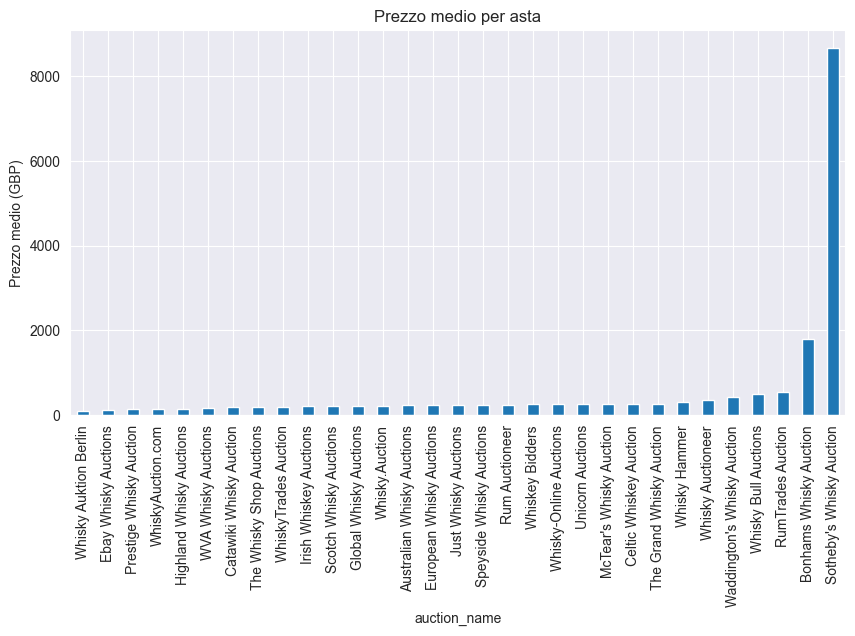

In [48]:

# Grafico dei prezzi medi delle aste
if "auction_name" in df.columns and "winning_bid_mean" in df.columns:
     plt.figure(figsize=(10, 5))
     df.groupby("auction_name")["winning_bid_mean"].mean().sort_values().plot(kind="bar")
     plt.title("Prezzo medio per asta")
     plt.ylabel("Prezzo medio (GBP)")
     plt.xticks(rotation=90)
     plt.show()

else:
 print("I dati ricevuti non contengono informazioni valide.")

In [54]:
 # Convertire in JSON per visualizzazione
whisky_json = df.to_json(orient="records", indent=4, force_ascii=False)
print("Dati in formato JSON:")
print(whisky_json)



Dati in formato JSON:
[
    {
        "dt":"2025-01-01",
        "winning_bid_max":11064.6,
        "winning_bid_min":10.6,
        "winning_bid_mean":263.94,
        "auction_trading_volume":211153.7,
        "auction_lots_count":800,
        "all_auctions_lots_count":40090,
        "auction_name":"Australian Whisky Auctions",
        "auction_slug":"australian-whisky-auctions"
    },
    {
        "dt":"2025-01-01",
        "winning_bid_max":6634.0,
        "winning_bid_min":0.0,
        "winning_bid_mean":157.59,
        "auction_trading_volume":786858.8,
        "auction_lots_count":4993,
        "all_auctions_lots_count":40090,
        "auction_name":"Catawiki Whisky Auction",
        "auction_slug":"catawiki"
    },
    {
        "dt":"2025-01-01",
        "winning_bid_max":2321.4,
        "winning_bid_min":4.2,
        "winning_bid_mean":200.41,
        "auction_trading_volume":9218.8,
        "auction_lots_count":46,
        "all_auctions_lots_count":40090,
        "auction_nam